In this experiment, I want to plot the mail communication done by Sara Shackleton by using the new parsing library. From exp 005 we can see that Sara seems to have quite consistent working hours until summer 2001. Let's check if this holds also for the raw data points.

In [1]:
%run ../src/parse_mails2.py

df = parse_maildir2("../data/maildir")

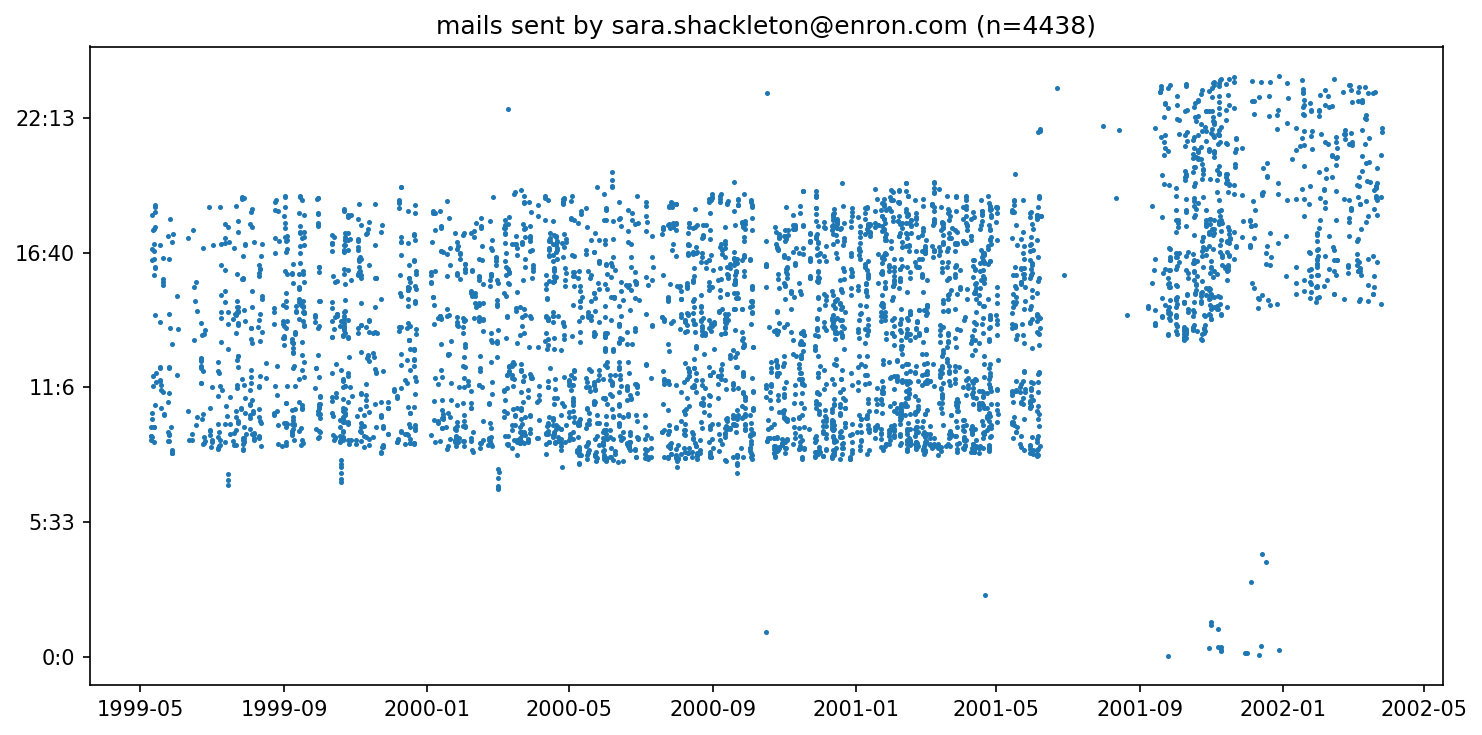

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%d:%d' % (hours, minutes)

formatter = FuncFormatter(seconds_in_time)

mails_sara = df[df["from"] == "sara.shackleton@enron.com"]
ax.scatter(mails_sara["date"], mails_sara["seconds_since_midnight"], s=2)
ax.set_title(f"mails sent by sara.shackleton@enron.com (n={len(mails_sara)})")
ax.yaxis.set_major_formatter(formatter)
fig.tight_layout()
fig.savefig("exp009.pdf")
plt.show()